In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import balancingData as baldata

In [3]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3575,9501-UKKNL,Male,0,No,No,59,No,No phone service,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,51.70,3005.8,No
2475,0320-DWVTU,Female,0,No,No,53,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,99.50,5424.25,No
6799,8071-SBTRN,Female,0,No,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Mailed check,111.15,7737.55,No
1848,7190-XHTWJ,Female,0,No,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.30,755.5,No
4423,5951-AOFIH,Male,0,No,No,33,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),66.40,2245.4,No


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488].TotalCharges
df[df.TotalCharges!=' '].shape
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [10]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

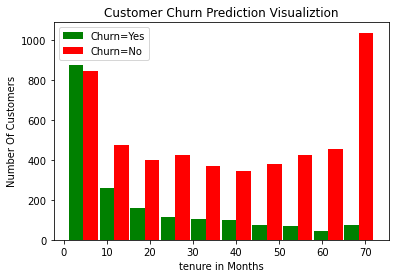

In [11]:
plt.xlabel("tenure in Months")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges


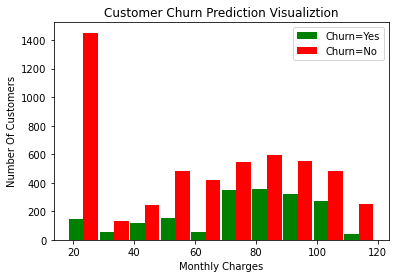

In [13]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [15]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [16]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [17]:
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

df1.gender.unique()

array([1, 0], dtype=int64)

In [19]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [22]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [23]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
y_train.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [26]:
import imblearn

# Random Forest

Using Random forest and checking Accuracy

In [27]:
from sklearn.ensemble import RandomForestClassifier


def RF(X_train, y_train, X_test, y_test,weights):
    model = RandomForestClassifier()
    
    if weights == -1:
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train, class_weight = weights)
    
  
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print(  model.score(X_test, y_test))
    
    return y_preds

In [28]:
y_pred = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.7704335465529495


using undersampling method and checking accuracy

In [29]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [30]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

In [31]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [32]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
y_test.value_counts()

1    374
0    374
Name: Churn, dtype: int64

In [35]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [36]:
y_pred = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.7834224598930482


Oversampling the dataset and checking accuracy

In [37]:
df_class_1.shape

(1869, 27)

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [39]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [40]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [42]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [43]:
y_pred = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.8964181994191674


Checking Accuracy with Ensemble method

In [44]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [45]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [47]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [48]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [49]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [50]:
df3_class0.shape

(4130, 27)

In [51]:
df3_class1.shape

(1495, 27)

In [53]:
X_train, y_train = baldata.my_ensemble_fuctn(df3_class0, df3_class1, 0, 1495)
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [54]:
y_pred1 = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.7427149964463398


In [56]:
X_train, y_train = baldata.my_ensemble_fuctn(df3_class0, df3_class1, 1495, 2990)
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [57]:
y_pred2 = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.728500355366027


In [58]:
X_train, y_train = baldata.my_ensemble_fuctn(df3_class0, df3_class1, 2990, 4130)
y_train.value_counts()

1    1495
0    1140
Name: Churn, dtype: int64

In [59]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [60]:
y_pred3 = RF(X_train, y_train, X_test, y_test ,weights=-1)

0.7185501066098081


In [61]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [62]:
len(y_pred_final)

1407

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407



# Naive Bayes

In [65]:
import sklearn

In [66]:
from sklearn.naive_bayes import GaussianNB


In [67]:
def NB(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    
    
    model.fit(X_train, y_train)
    
    
  
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print(  model.score(X_test, y_test))
    
    return y_preds

In [68]:
y_pred = NB(X_train, y_train, X_test, y_test)

0.7192608386638237


In [73]:
y_train.value_counts()

1    1495
0    1140
Name: Churn, dtype: int64

Undersampling and Naive Bayes

In [70]:
y_pred = NB(X_train, y_train, X_test, y_test ,weights=-1)

TypeError: NB() got an unexpected keyword argument 'weights'

In [71]:
y_train.value_counts()

1    1495
0    1140
Name: Churn, dtype: int64

Oversampling naive bayes

In [72]:
y_pred = NB(X_train, y_train, X_test, y_test ,weights=-1)

TypeError: NB() got an unexpected keyword argument 'weights'

In [138]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

enmsemble method with naive bayes

In [150]:
y_pred1 = NB(X_train, y_train, X_test, y_test ,weights=-1)

0.7221037668798863


In [151]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [153]:
y_pred2 = NB(X_train, y_train, X_test, y_test ,weights=-1)

0.7249466950959488


In [154]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [156]:
y_pred3 = NB(X_train, y_train, X_test, y_test ,weights=-1)

0.7192608386638237


In [157]:
y_train.value_counts()

1    1495
0    1140
Name: Churn, dtype: int64

In [159]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [161]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.72      0.74      1407



# Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
def LR(X_train, y_train, X_test, y_test,weights):
    model = LogisticRegression()
    
    if weights == -1:
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train, class_weight = weights)
    
  
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print(  model.score(X_test, y_test))
    
    return y_preds

In [103]:
y_pred = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.7945984363894811


In [105]:
y_train.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [113]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [114]:
y_pred = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.7606951871657754


In [121]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [122]:
y_pred = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.7725072604065828


ensemble method

In [144]:
y_pred1 = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.7476901208244492


In [146]:
y_pred2 = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.7377398720682303


In [148]:
y_pred3 = LR(X_train, y_train, X_test, y_test ,weights=-1)

0.6965174129353234


In [149]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [152]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407

